In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('mty.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS
0,25/01/2018,22:00,23,16,22.82,46.1,14.2,55,935.0,0.0,236.2,18.4,32,6,13.3
1,25/01/2018,23:00,17,9,24.53,50.0,11.4,73,935.7,0.0,47.0,11.9,46,6,13.6
2,26/01/2018,00:00,31,13,13.18,40.3,10.2,85,936.4,0.0,5.2,9.9,60,6,13.8
3,26/01/2018,01:00,30,41,10.50,23.4,9.8,90,936.9,0.0,0.0,9.5,72,6,13.8
4,26/01/2018,02:00,26,40,9.64,18.7,9.7,93,937.2,0.0,0.0,9.8,78,6,13.7


In [4]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
VELS          float64
VELR          float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RADSOL        float64
TEMPCOMB      float64
HUMCOMB         int64
HUMSUBS         int64
TEMPSUBS      float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True) #dayfirst=True no voltear el primero de febrero como primer día en la gráfica
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
# Realiza un análisis exploratorio de datos
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS,FECHA
0,23,16,22.82,46.1,14.2,55,935.0,0.0,236.2,18.4,32,6,13.3,2018-01-25 22:00:00
1,17,9,24.53,50.0,11.4,73,935.7,0.0,47.0,11.9,46,6,13.6,2018-01-25 23:00:00
2,31,13,13.18,40.3,10.2,85,936.4,0.0,5.2,9.9,60,6,13.8,2018-01-26 00:00:00
3,30,41,10.50,23.4,9.8,90,936.9,0.0,0.0,9.5,72,6,13.8,2018-01-26 01:00:00
4,26,40,9.64,18.7,9.7,93,937.2,0.0,0.0,9.8,78,6,13.7,2018-01-26 02:00:00


In [8]:
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS
count,146.000000,146.00000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,136.753425,122.50000,5.878836,16.180137,12.515068,71.780822,936.978082,0.002740,121.837671,13.164384,67.226027,5.890411,13.677397
std,101.851113,103.58806,5.435516,11.185432,6.007861,24.955545,4.064523,0.023327,205.854131,8.090486,23.560274,0.313452,1.202169
min,7.000000,2.00000,0.290000,4.300000,-1.100000,21.000000,928.400000,0.000000,0.000000,-2.400000,14.000000,5.000000,11.300000
25%,29.250000,27.00000,2.022500,6.800000,8.750000,55.000000,934.300000,0.000000,0.000000,8.250000,50.250000,6.000000,12.725000
50%,148.000000,107.00000,3.045000,11.000000,13.700000,76.500000,936.400000,0.000000,0.250000,13.000000,72.500000,6.000000,13.950000
75%,198.500000,220.50000,9.322500,23.400000,16.900000,94.000000,940.400000,0.000000,184.625000,18.100000,86.000000,6.000000,14.700000
max,359.000000,358.00000,24.530000,50.000000,22.500000,100.000000,945.100000,0.200000,845.200000,31.800000,96.000000,6.000000,15.800000


In [9]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS,FECHA


In [10]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS        136.753425
DIRR        122.500000
VELS          5.878836
VELR         16.180137
TEMP         12.515068
HR           71.780822
PB          936.978082
PREC          0.002740
RADSOL      121.837671
TEMPCOMB     13.164384
HUMCOMB      67.226027
HUMSUBS       5.890411
TEMPSUBS     13.677397
dtype: float64

In [11]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

12.515068493150688

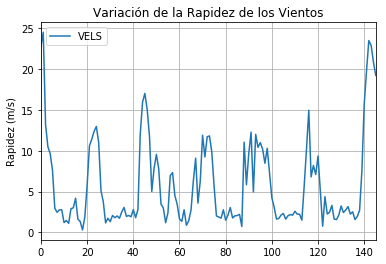

In [12]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

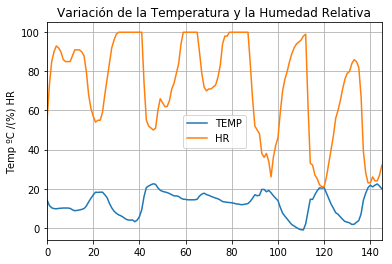

In [13]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

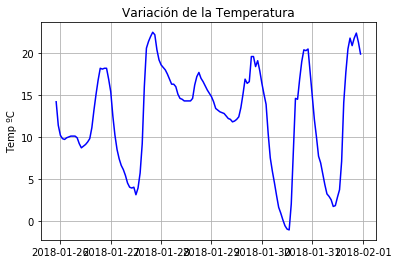

In [14]:
# Gráfica de Fecha y Temperatura
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

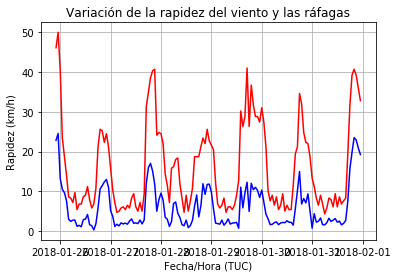

In [15]:
#gráfica de la rapidez de las ráfagas respecto al tiempo
plt.plot_date(x=df.FECHA, y=df.VELS, fmt="b-")
plt.plot_date(x=df.FECHA, y=df.VELR, fmt="r-")
plt.title("Variación de la rapidez del viento y las ráfagas")
plt.ylabel("Rapidez (km/h)")
plt.xlabel("Fecha/Hora (TUC)")
plt.grid(True)
plt.show()

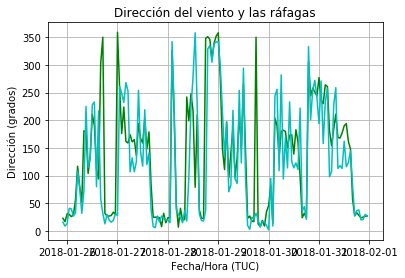

In [16]:
#Gráfica de la dirección de los vientos respecto al tiempo
plt.plot_date(x=df.FECHA, y=df.DIRS, fmt="g-")
plt.plot_date(x=df.FECHA, y=df.DIRR, fmt="c-")
plt.title("Dirección del viento y las ráfagas")
plt.ylabel("Dirección (grados)")
plt.xlabel("Fecha/Hora (TUC)")
plt.grid(True)
plt.show()

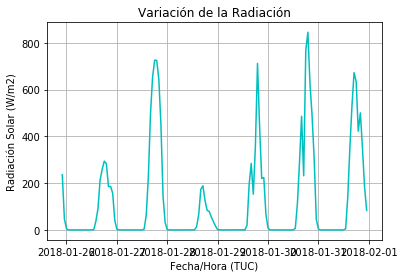

In [17]:
#Gráfica de  la radiación solar respecto al tiempo
plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="c-")
plt.title("Variación de la Radiación")
plt.ylabel("Radiación Solar (W/m2)")
plt.xlabel("Fecha/Hora (TUC)")
plt.grid(True)
plt.show()

In [18]:
#Ecuación de diferencia entre temperatura máxima y temperatura mínima

In [19]:
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS
count,146.000000,146.00000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,136.753425,122.50000,5.878836,16.180137,12.515068,71.780822,936.978082,0.002740,121.837671,13.164384,67.226027,5.890411,13.677397
std,101.851113,103.58806,5.435516,11.185432,6.007861,24.955545,4.064523,0.023327,205.854131,8.090486,23.560274,0.313452,1.202169
min,7.000000,2.00000,0.290000,4.300000,-1.100000,21.000000,928.400000,0.000000,0.000000,-2.400000,14.000000,5.000000,11.300000
25%,29.250000,27.00000,2.022500,6.800000,8.750000,55.000000,934.300000,0.000000,0.000000,8.250000,50.250000,6.000000,12.725000
50%,148.000000,107.00000,3.045000,11.000000,13.700000,76.500000,936.400000,0.000000,0.250000,13.000000,72.500000,6.000000,13.950000
75%,198.500000,220.50000,9.322500,23.400000,16.900000,94.000000,940.400000,0.000000,184.625000,18.100000,86.000000,6.000000,14.700000
max,359.000000,358.00000,24.530000,50.000000,22.500000,100.000000,945.100000,0.200000,845.200000,31.800000,96.000000,6.000000,15.800000
